In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading Dataset

amazon_df = pd.read_csv("amazon_prime_titles.csv")

In [4]:
# Understanding the data (first 5 records)

amazon_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [5]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [6]:
amazon_df.shape

(9668, 12)

# Data Cleaning

In [7]:
# 1.Check missing values
amazon_df.isnull().sum().sort_values(ascending=False)

date_added      9513
country         8996
director        2083
cast            1233
rating           337
title              0
show_id            0
type               0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
# 2. Check and Remove duplicate records
amazon_df.duplicated().sum()

np.int64(0)

In [9]:
amazon_df.drop_duplicates(inplace=True)

In [10]:
# 3. Convert date_added to datetime
amazon_df['date_added'] = pd.to_datetime(amazon_df['date_added'], errors='coerce')

In [11]:
amazon_df["date_added"]

0      2021-03-30
1      2021-03-30
2      2021-03-30
3      2021-03-30
4      2021-03-30
          ...    
9663          NaT
9664          NaT
9665          NaT
9666          NaT
9667          NaT
Name: date_added, Length: 9668, dtype: datetime64[ns]

In [12]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       9668 non-null   object        
 1   type          9668 non-null   object        
 2   title         9668 non-null   object        
 3   director      7585 non-null   object        
 4   cast          8435 non-null   object        
 5   country       672 non-null    object        
 6   date_added    155 non-null    datetime64[ns]
 7   release_year  9668 non-null   int64         
 8   rating        9331 non-null   object        
 9   duration      9668 non-null   object        
 10  listed_in     9668 non-null   object        
 11  description   9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 906.5+ KB


In [13]:
# 4. Extract year and month
amazon_df['added_year'] = amazon_df['date_added'].dt.year
amazon_df['added_month'] = amazon_df['date_added'].dt.month_name()

In [14]:
#display the new columns
amazon_df[["date_added","added_year","added_month"]].head(10)

,date_added,added_year,added_month
0,2021-03-30,2021.0,March
1,2021-03-30,2021.0,March
2,2021-03-30,2021.0,March
3,2021-03-30,2021.0,March
4,2021-03-30,2021.0,March
5,2021-03-30,2021.0,March
6,2021-03-30,2021.0,March
7,2021-03-30,2021.0,March
8,2021-03-30,2021.0,March
9,2021-04-01,2021.0,April


# Handling Missing/Null Values

In [15]:
#fetching null values or missing values in dataframe to get the count of null values in each column
amazon_df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
added_year      9513
added_month     9513
dtype: int64

In [16]:
# Handle missing values
amazon_df['rating'].fillna(amazon_df['rating'].mode()[0], inplace=True)    # Filling rating null values with most frequent rating
amazon_df['country'].fillna('Unknown', inplace=True)
amazon_df['director'].fillna('Unknown', inplace=True)
amazon_df['cast'].fillna('Unknown', inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_12508\3211749969.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon_df['rating'].fillna(amazon_df['rating'].mode()[0], inplace=True)    # Filling rating null values with most frequent rating
C:\Users\user\AppData\Local\Temp\ipykernel_12508\3211749969.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the interm

In [17]:
# Ensure release_year is numeric
amazon_df['release_year'] = pd.to_numeric(amazon_df['release_year'], errors='coerce')

In [18]:
amazon_df.isnull().sum()

# Some records may not have date_added, resulting in null year/month

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added      9513
release_year       0
rating             0
duration           0
listed_in          0
description        0
added_year      9513
added_month     9513
dtype: int64

In [19]:
amazon_df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
added_year             float64
added_month             object
dtype: object

# Exploratory Data Analysis (EDA)

In [20]:
# To find number of movies and TV shows on Amazon Prime
#count of content type
amazon_df['type'].value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

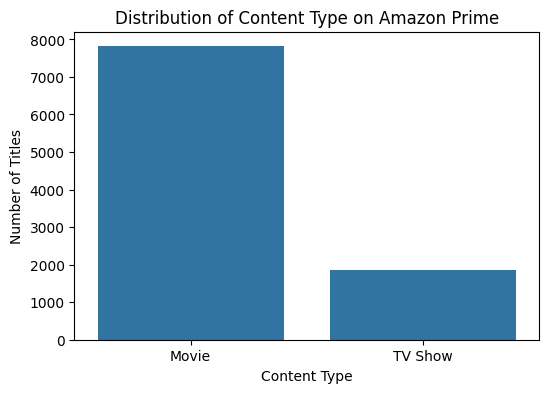

In [21]:
# 1.Content Type Distribution (Movie vs TV Show)

plt.figure(figsize=(6,4))
sns.countplot(x="type", data=amazon_df)
plt.title("Distribution of Content Type on Amazon Prime")
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")
plt.show()

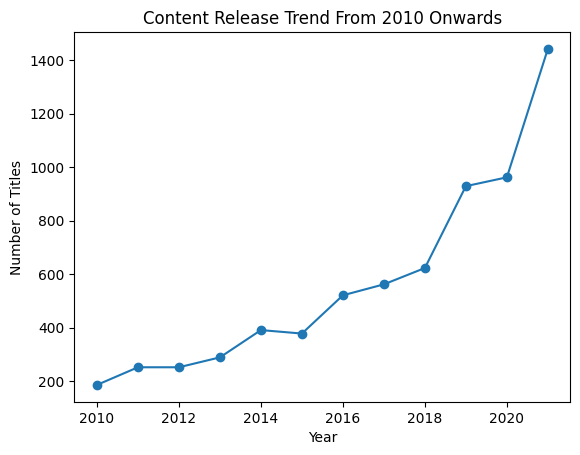

In [22]:
# 2.Content Release Trend on Amazon Prime (2010 Onwards)

#--The trend line displays the number of titles released starting from the year 2010.
#--Years before 2010 were excluded to focus on recent content growth and clearer trend analysis.

trend_2010 = amazon_df[amazon_df['release_year'] >= 2010]['release_year'].value_counts().sort_index()

trend_2010.plot(kind='line', marker='o')

plt.title("Content Release Trend From 2010 Onwards")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


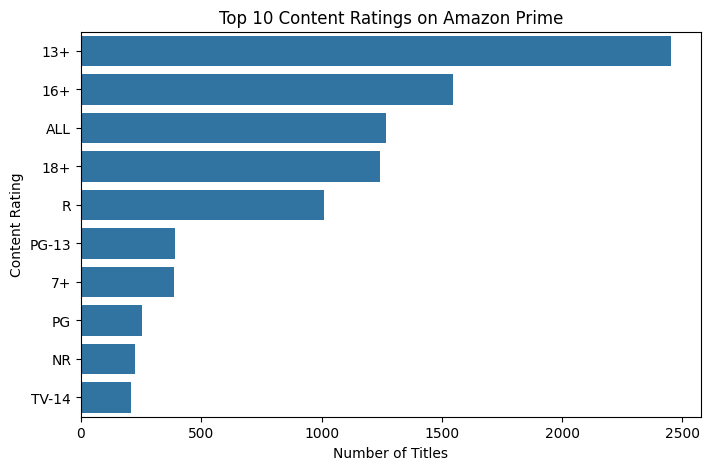

In [23]:
# 3.Top 10 Content rating distribution
top_10_ratings = amazon_df["rating"].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_10_ratings.values,y=top_10_ratings.index)

plt.title("Top 10 Content Ratings on Amazon Prime")
plt.xlabel("Number of Titles")
plt.ylabel("Content Rating")
plt.show()

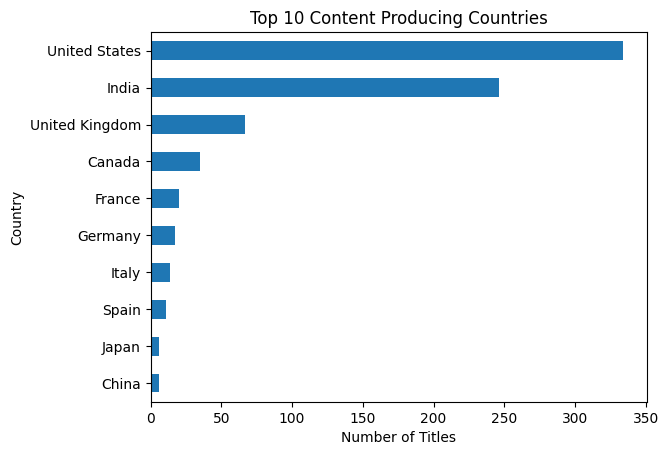

In [24]:
# 4.Top 10 Countries Producing Content
top_countries = (amazon_df['country'].str.split(', ').explode().value_counts().drop('Unknown', errors='ignore').head(10))

top_countries.sort_values().plot(kind='barh')

plt.title("Top 10 Content Producing Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


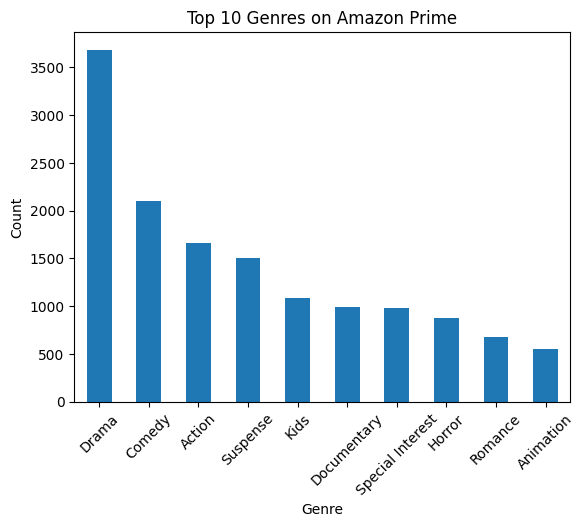

In [25]:
# 5.Top 10 Genres
genre_count = amazon_df['listed_in'].str.split(', ').explode().value_counts().head(10)

genre_count.plot(kind='bar')
plt.title("Top 10 Genres on Amazon Prime")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


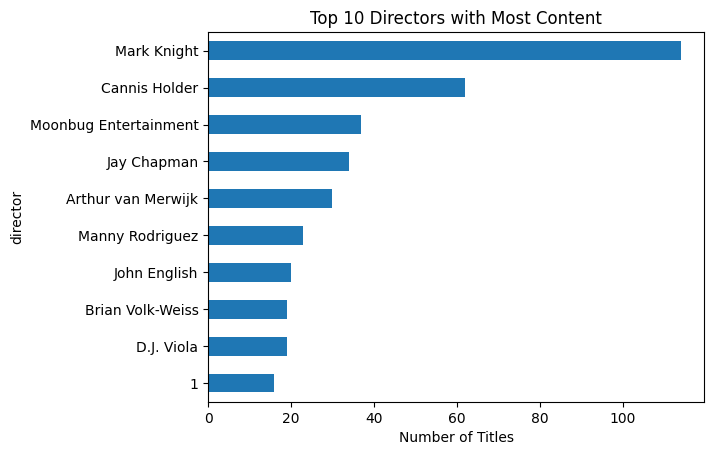

In [26]:
# 6.Top Directors with Most Content
top_directors = amazon_df['director'].str.split(', ').explode().value_counts()
# Removing Unknown
top_directors = top_directors.drop('Unknown', errors='ignore').head(10)
#visualization
top_directors.sort_values().plot(kind='barh')
plt.title("Top 10 Directors with Most Content")
plt.xlabel("Number of Titles")
plt.show()


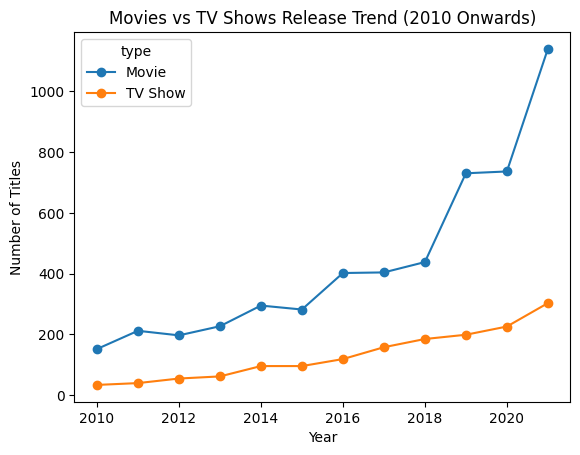

In [27]:
# 7.Movies vs TV Shows Trend Over Years
type_trend = amazon_df.groupby(['release_year', 'type']).size().unstack()

type_trend[type_trend.index >= 2010].plot(kind='line', marker='o')

plt.title("Movies vs TV Shows Release Trend (2010 Onwards)")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


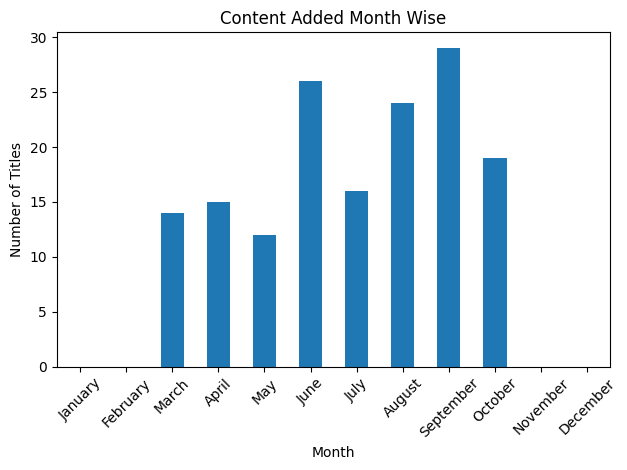

In [31]:
# 8.Content Added Month Wise (Seasonality Analysis)

month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

month_trend = amazon_df['added_month'].value_counts().reindex(month_order)

month_trend.plot(kind='bar')

plt.title("Content Added Month Wise")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
